# Project - Detect car in snow

## Group12

In [1]:
#Get the nordic vehicle dataset (NVD)  
!wget -O '/Advanced deep learning/Project/Data/LabeledFrames.zip' 'https://filedn.eu/lwnF6OGJjyNyTUCGJUbsnVp/public_data/project_nvd/Labeled%20Frames%20(YOLO%20Format).zip'


--2024-05-12 09:34:38--  https://filedn.eu/lwnF6OGJjyNyTUCGJUbsnVp/public_data/project_nvd/Labeled%20Frames%20(YOLO%20Format).zip
Resolving filedn.eu (filedn.eu)... 45.131.244.47
Connecting to filedn.eu (filedn.eu)|45.131.244.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25716186975 (24G) [application/zip]
Saving to: ‘/Advance deep learning/Data/LabeledFrames.zip’

/Advance deep learn 100%[===================>]  23.95G  9.09MB/s    in 94m 24s 

2024-05-12 11:09:02 (4.33 MB/s) - ‘/Advance deep learning/Data/LabeledFrames.zip’ saved [25716186975/25716186975]



In [ ]:
# Unzip the data  
!unzip '/Advanced deep learning/Project/Data/LabeledFrames.zip' -d '/Advanced deep learning/Project/Data/LabeledFrames/'

Archive:  /Advanced deep learning/Project/Data/LabeledFrames.zip
   creating: /Advanced deep learning/Project/Data/LabeledFrames/images/
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0080.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0081.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0082.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0083.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0084.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0085.png  
 extracting: /Advanced deep learning/Project/Data/LabeledFrames/images/2022-12-02 Asjo 01_stabilized-frame0086.png  
 extracting: /Advanced deep learning/Project

In [5]:
# List the files dowloaded from NVD
!ls -la '/Advanced deep learning/Project/Data/LabeledFrames'

total 1620
drwxr-xr-x 4 root root   4096 May 12 11:27 .
drwxr-xr-x 3 root root   4096 May 12 11:21 ..
drwxr-xr-x 3 root root 622592 May 12 11:46 images
drwxr-xr-x 2 root root 581632 Mar 13  2023 labels
-rw-r--r-- 1 root root  71458 Mar 13  2023 test.txt
-rw-r--r-- 1 root root 220116 Mar 13  2023 train.txt
-rw-r--r-- 1 root root 146251 Mar 13  2023 val.txt


In [ ]:
# Install git by going to File > new > Terminal and run following commands..
apt-get update
apt-get install -y git

In [7]:
# Navigate to the location where we want to clone yolov9 model
%cd /Advanced deep learning/Project/Models

/Advanced deep learning/Project/Models


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [9]:
# Clone yolov9 model from git... needed only one time
!git clone https://github.com/SkalskiP/yolov9.git

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 7.08 MiB/s, done.
Resolving deltas: 100% (165/165), done.


In [10]:
# Navigate to the yolov9 folder. 
#This is where all the work will be done
%cd yolov9

/Advanced deep learning/Project/Models/yolov9


In [12]:
# Install all the required packages by yolov9
!pip install -r requirements.txt -q

In [14]:
# Check the version of pillow. It must be 9.4.0.. If its above that 
# then it fails to create images showing the prediction with boudary
# boxes on th detected cars.  
!pip show Pillow

Name: pillow
Version: 10.3.0
Summary: Python Imaging Library (Fork)
Home-page: 
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: HPND
Location: /usr/local/lib/python3.11/dist-packages
Requires: 
Required-by: imageio, matplotlib, scikit-image, torchvision


In [15]:
!pip install Pillow==9.4.0

  Using cached Pillow-9.4.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (9.3 kB)
Using cached Pillow-9.4.0-cp311-cp311-manylinux_2_28_x86_64.whl (3.4 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.3.0
    Uninstalling pillow-10.3.0:
      Successfully uninstalled pillow-10.3.0


In [20]:
# Dowload all the pre-trained yolov9 weights
!wget -P '/Advanced deep learning/Project/Models/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P '/Advanced deep learning/Project/Models/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P '/Advanced deep learning/Project/Models/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P '/Advanced deep learning/Project/Models/yolov9/weights' -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [21]:
# list all the files in the weights folder
!ls -la '/Advanced deep learning/Project/Models/yolov9/weights'

total 402452
drwxr-xr-x  2 root root      4096 May 12 12:27 .
drwxr-xr-x 12 root root      4096 May 12 12:27 ..
-rw-r--r--  1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r--  1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r--  1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r--  1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [2]:
# making sure we are still in the yolov9 library
%cd /Advanced deep learning/Project/Models/yolov9

# Training with the yolov9 model
!python train_dual.py \
--batch 5 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data data/NVD.yaml \
--weights /weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/Advanced deep learning/Project/Models/yolov9


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


2024-05-12 13:00:56.614605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
train_dual: weights=/weights/yolov9-c.pt, cfg=models/detect/yolov9-c.yaml, data=data/coco.yaml, hyp=hyp.scratch-high.yaml, epochs=25, batch_size=5, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias

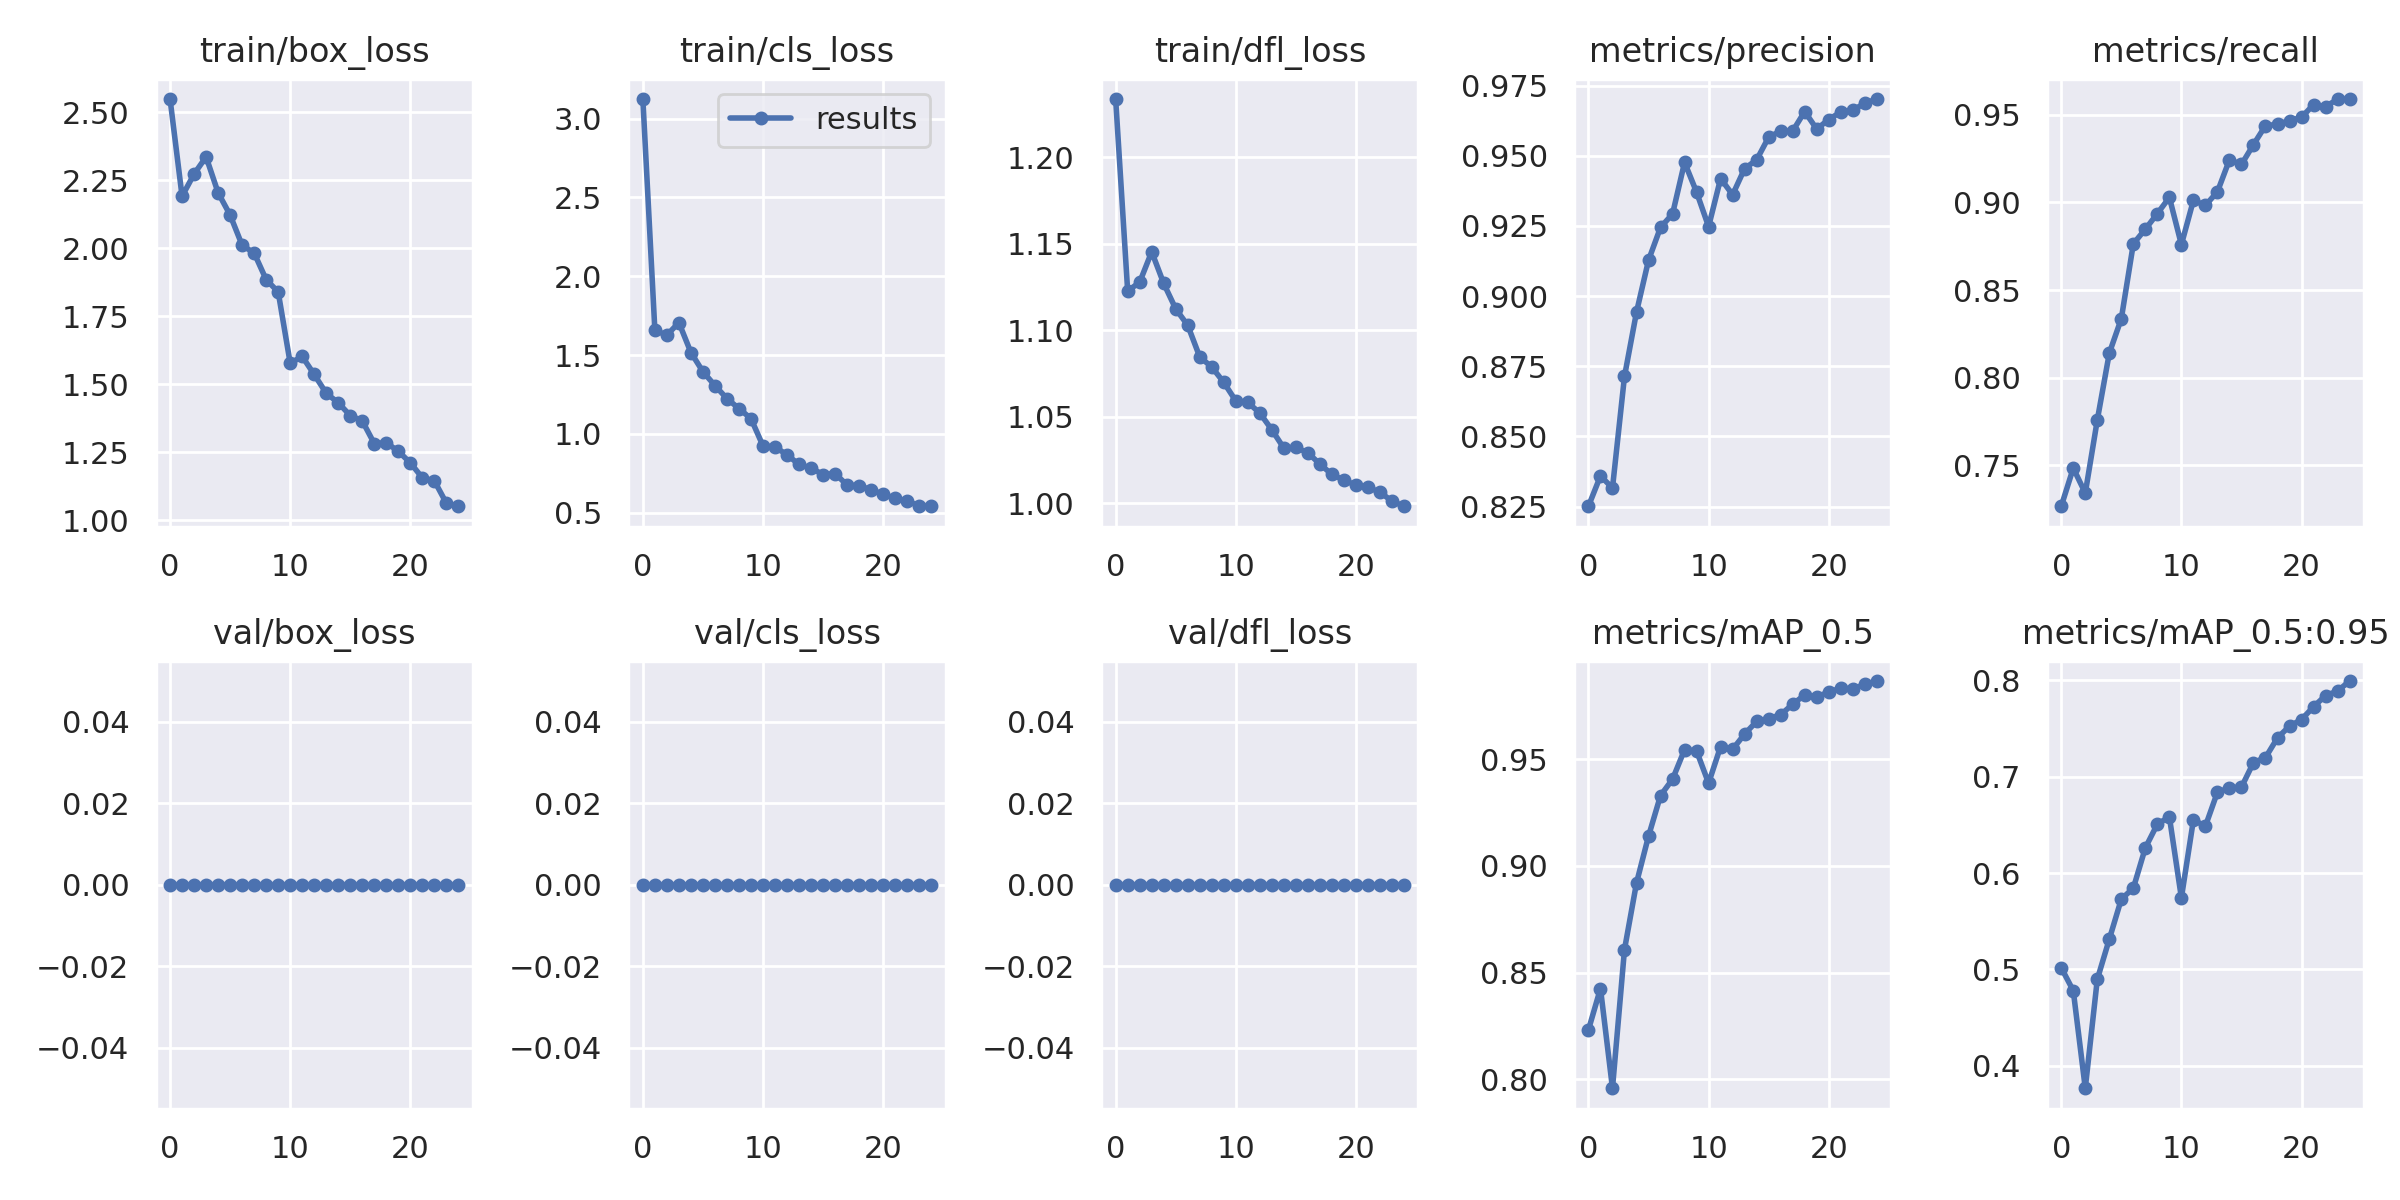

In [3]:
# Visualise metrics, loss progression with increasing epochs
# /runs/train/exp2
from IPython.display import Image

Image(filename=f"/Advanced deep learning/Project/Models/yolov9/runs/train/exp2/results.png", width=1000)

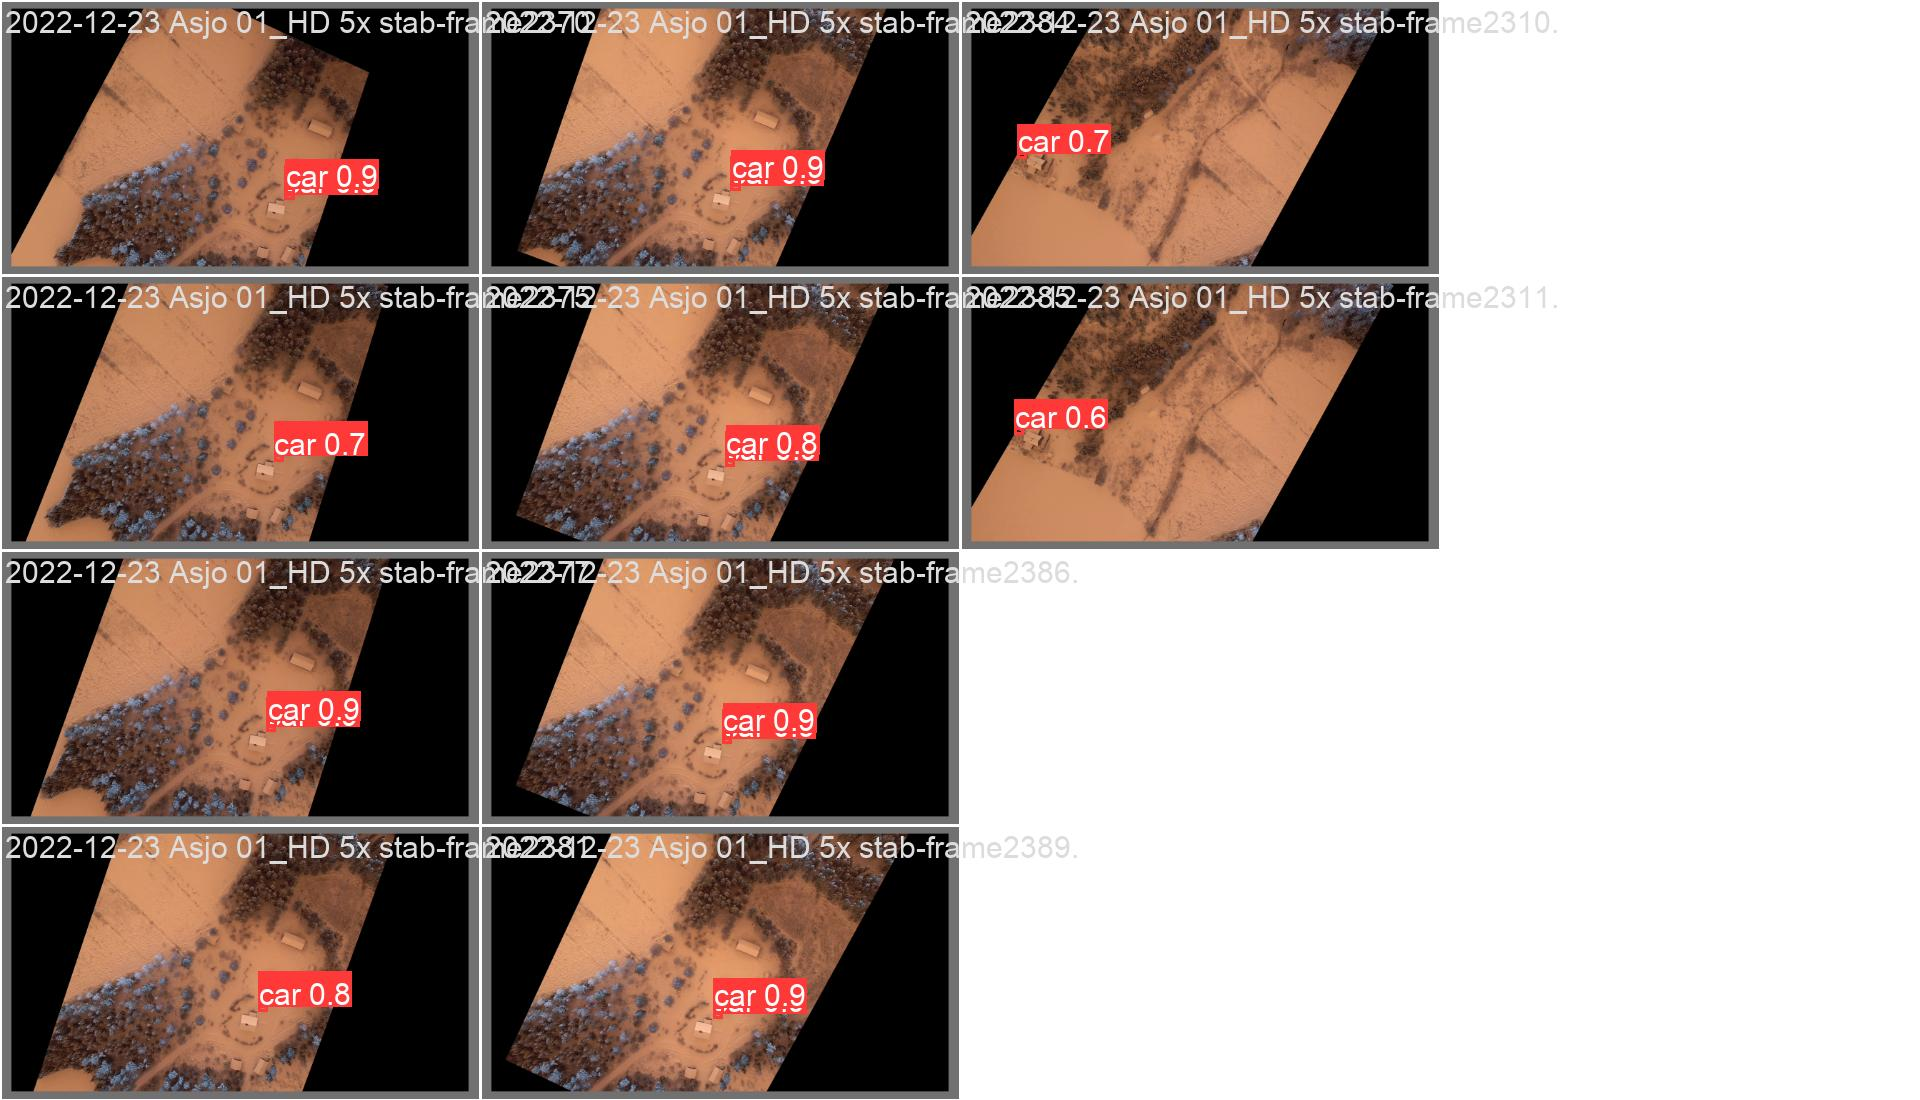

In [4]:
# Visualise prediction on a sample image from validation
from IPython.display import Image

Image(filename=f"/Advanced deep learning/Project/Models/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

# Test on test images

In [5]:
## Create a separate folder for test images
import os
import shutil

# Path to the folder containing all images
source_folder = '/Advanced deep learning/Project/Data/LabeledFrames/images'

# Path to the text file containing image names
text_file = '/Advanced deep learning/Project/Data/LabeledFrames/test.txt'

# Path to the folder where you want to copy the test images
destination_folder = '/Advanced deep learning/Project/Data/LabeledFrames/test_images'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Read image paths from the text file
with open(text_file, 'r') as file:
    image_paths = file.readlines()

# Remove any whitespace characters from the image paths
image_paths = [path.strip() for path in image_paths]

# Copy images to the destination folder
for image_path in image_paths:
    # Extract the image name from the image path
    image_name = os.path.basename(image_path)
    
    # Construct source and destination paths
    source_path = os.path.join(source_folder, image_name)
    destination_path = os.path.join(destination_folder, image_name)
    
    # Copy the image to the destination folder
    shutil.copy(source_path, destination_path)
    
    print(f"Copied {image_name} to {destination_folder}")


Copied 2022-12-23 Bjenberg 02_stabilized-frame000007.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000008.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000009.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000010.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000011.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000012.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000013.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-23 Bjenberg 02_stabilized-frame000014.png to /Advanced deep learning/Project/Data/LabeledFrames/test_images
Copied 2022-12-2

In [7]:
# Run test on all test images (1191). Use the weights from the training.
# Store the results in /runs/detect/yolov9_NVD_test
!python detect.py --source '/Advanced deep learning/Project/Data/LabeledFrames/test_images' \
--img 640 --device 0 \
--weights '/Advanced deep learning/Project/Models/yolov9/runs/train/exp2/weights/best.pt' \
--name yolov9_NVD_test

detect: weights=['/Advanced deep learning/Project/Models/yolov9/runs/train/exp2/weights/best.pt'], source=/Advanced deep learning/Project/Data/LabeledFrames/test_images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_NVD_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
fatal: cannot change to '/Advanced': No such file or directory
YOLOv5 🚀 2024-5-12 Python-3.11.0rc1 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11004MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50958630 parameters, 0 gradients, 237.6 GFLOPs
image 1/1191 /Advanced deep learning/Project/Data/LabeledFrames/test_images/2022-12-23 Bjenberg 02_stabilized-frame000007.png: 384x640 (no detections), 111.8ms
ima

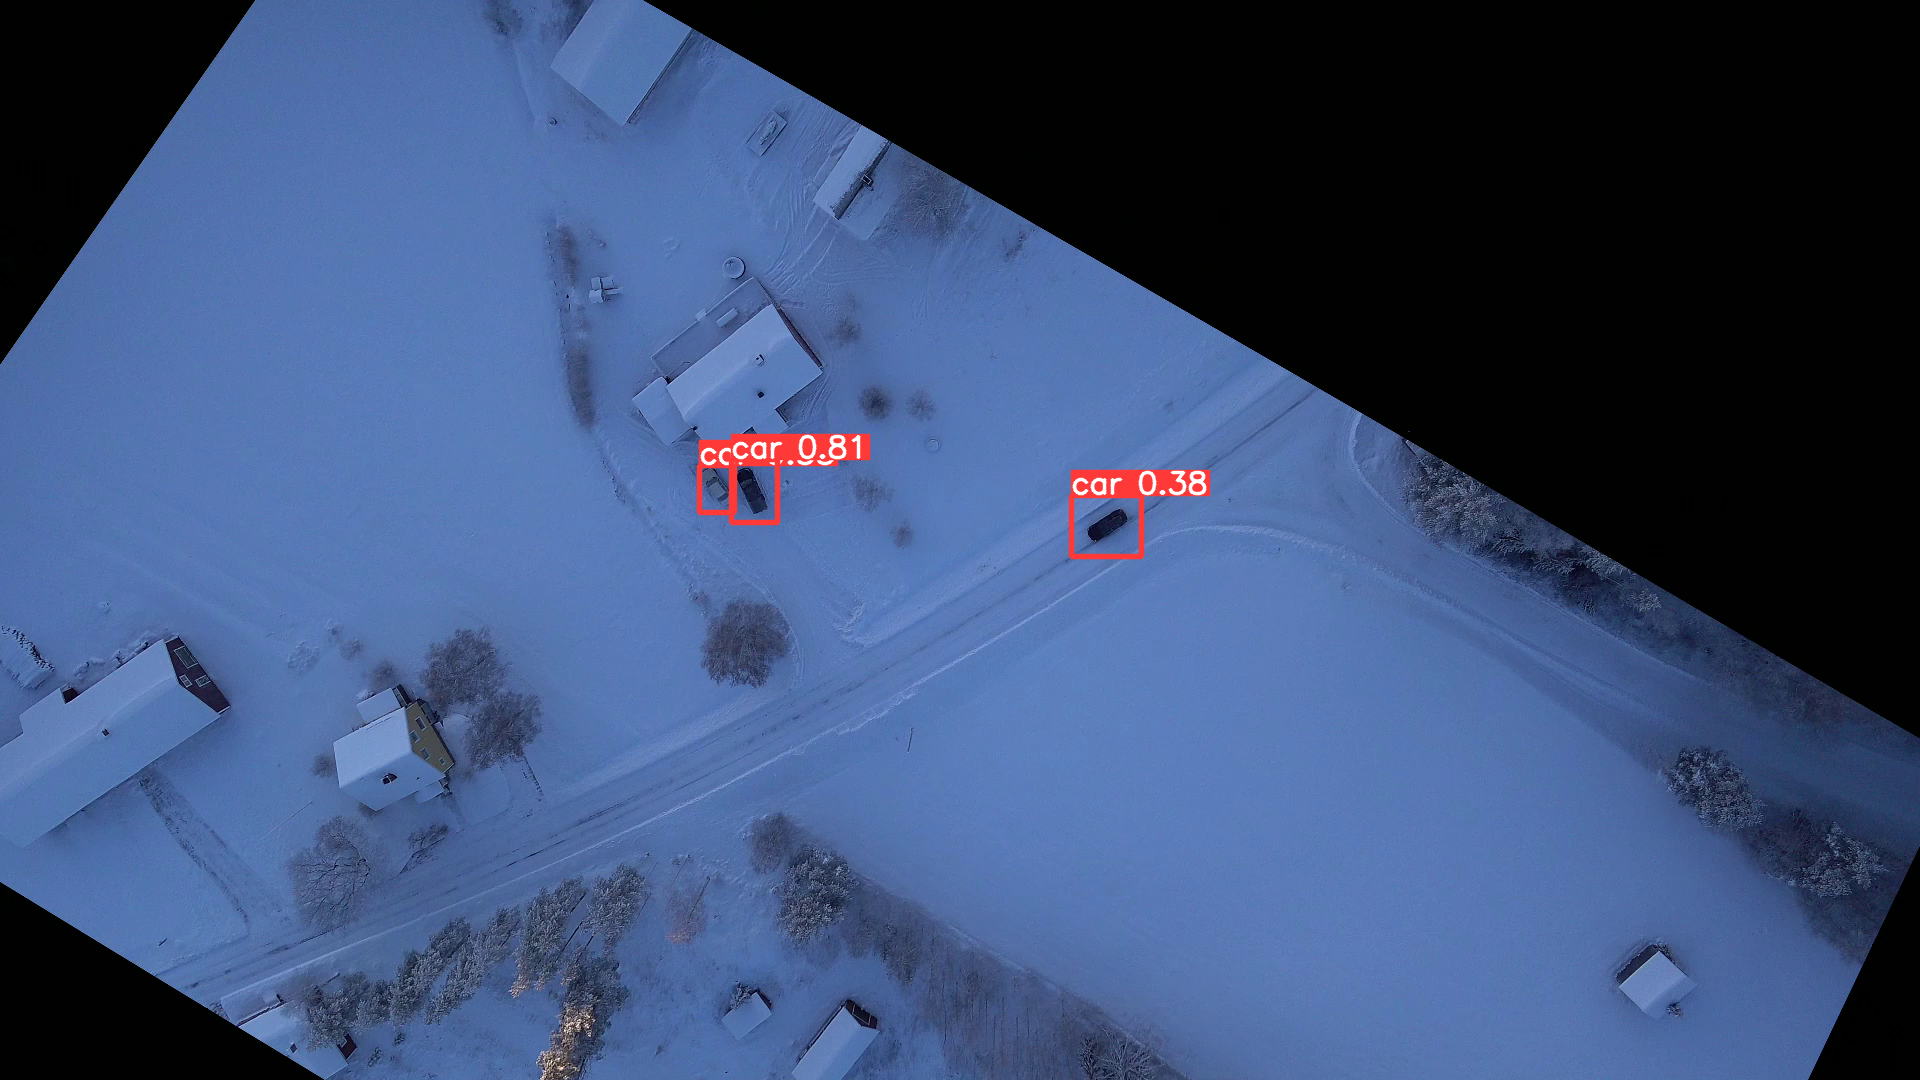

In [8]:
# Visualise prediction on a sample test image where cars were detected
from IPython.display import Image

Image(filename=f"/Advanced deep learning/Project/Models/yolov9/runs/detect/yolov9_NVD_test/2022-12-23 Bjenberg 02_stabilized-frame001991.png", width=1000)

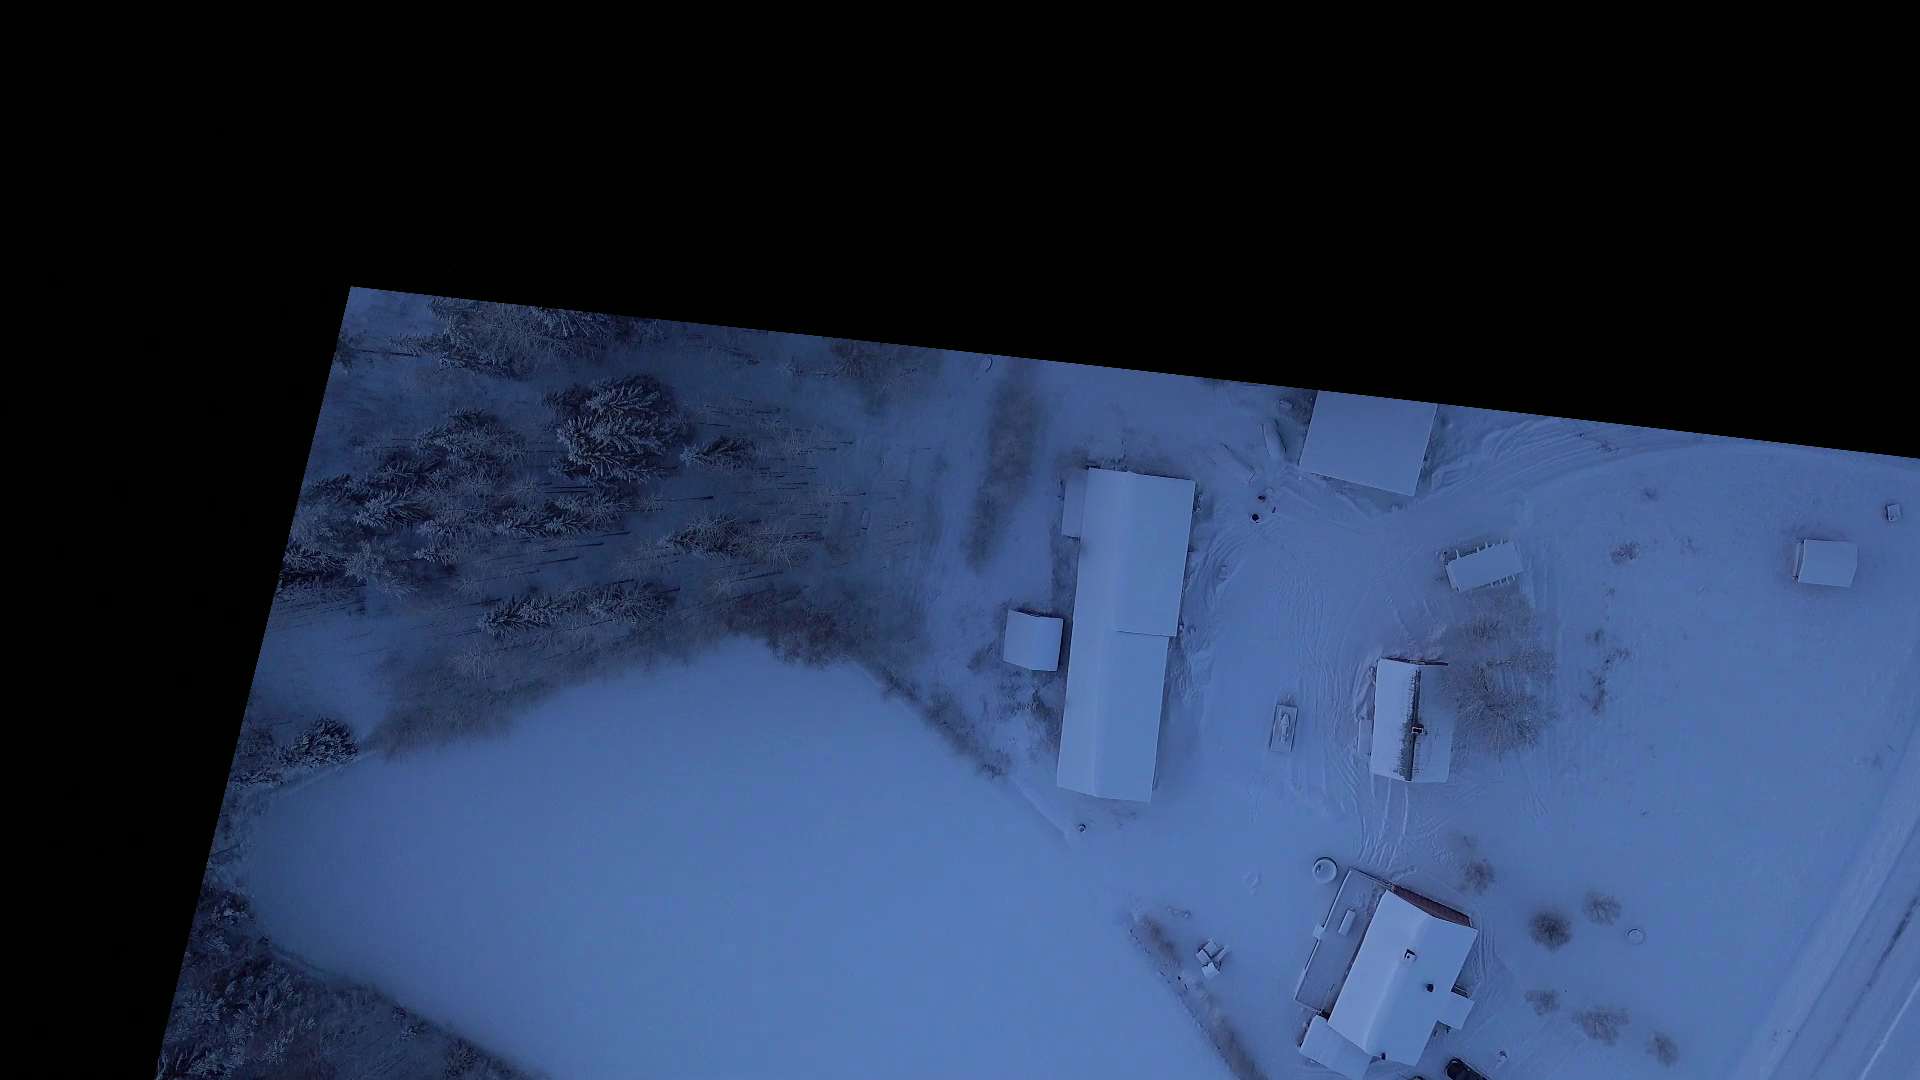

In [9]:
# Visualise prediction on a sample test image where car is not detected
Image(filename=f"/Advanced deep learning/Project/Models/yolov9/runs/detect/yolov9_NVD_test/2022-12-23 Bjenberg 02_stabilized-frame002006.png", width=1000)